In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import h5py as hdf
plt.rcParams['figure.facecolor'] = 'white'

In [10]:
def gather_universal(path: str,filetype: str)-> list:
    subdir=path

    data=[]
    for path, subdirs, files in os.walk(subdir):
        for name in files:
            if name.endswith(filetype) and name[-5]!='t'  :

                b=(str(os.path.join(path, name)))
                data.append(b)
    return data
path='data/hdf/'
display(gather_universal(path,'.hdf5'))

def get_hdf_main_groups(path) -> list:
    with hdf.File(path,'r') as r:
        #display([str(i) for i in r.keys()])
        return [str(i) for i in r.keys()]

def get_hdf_group_datasets(path,groupkey) -> list:
    with hdf.File(path,'r') as r:
        #display([str(i) for i in r[groupkey].keys()])
        return [str(i) for i in r[groupkey].keys()]

def get_df_columns(path)-> pd.DataFrame:
    groups=get_hdf_main_groups(path)
    cols=[]
    for key in groups:
       cols=cols+ list(zip(list(np.full(len(get_hdf_group_datasets(path,key)),key)),
                 get_hdf_group_datasets(path,key)))

    #display(cols)
    columns=pd.MultiIndex.from_tuples(cols, names=('group', 'dataset'))
    #display(pd.DataFrame(columns=columns))
    return columns

def steps_to_df(seriespath,examplefilepath)->pd.DataFrame:
    path=seriespath
    series=pd.DataFrame(index=gather_universal(path,'.hdf5'),columns=get_df_columns(examplefilepath))

    for file in series.index:
        with hdf.File(str(file),'r') as r:
            for location in series.columns:
                series.loc[file,location]=r[location[0]][location[1]][:]
    return series
series=steps_to_df('data/hdf','data/hdf/series_step_115.hdf5')

['data/hdf/series_step_104.hdf5',
 'data/hdf/series_step_105.hdf5',
 'data/hdf/series_step_106.hdf5',
 'data/hdf/series_step_113.hdf5',
 'data/hdf/series_step_114.hdf5',
 'data/hdf/series_step_115.hdf5',
 'data/hdf/series_step_122.hdf5',
 'data/hdf/series_step_123.hdf5',
 'data/hdf/series_step_124.hdf5',
 'data/hdf/series_step_131.hdf5']

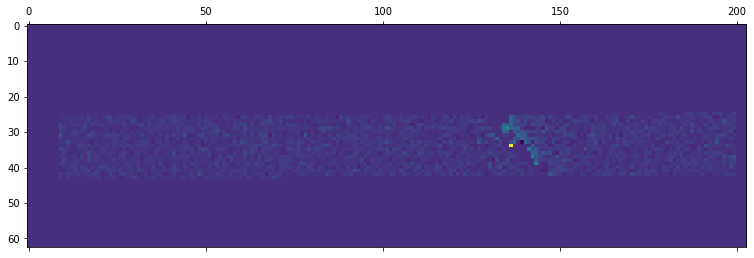

In [13]:
plt.matshow(series.loc['data/hdf\series_step_122.hdf5',('strains','strain_p1')])

In [14]:
display([i for i in series.index])
display([i for i in series.columns])

['data/hdf\\series_step_104.hdf5',
 'data/hdf\\series_step_105.hdf5',
 'data/hdf\\series_step_106.hdf5',
 'data/hdf\\series_step_113.hdf5',
 'data/hdf\\series_step_114.hdf5',
 'data/hdf\\series_step_115.hdf5',
 'data/hdf\\series_step_122.hdf5',
 'data/hdf\\series_step_123.hdf5',
 'data/hdf\\series_step_124.hdf5',
 'data/hdf\\series_step_131.hdf5']

[('add_data', 'analog_channels'),
 ('coordinates', 'coordinate_x'),
 ('coordinates', 'coordinate_x_var'),
 ('coordinates', 'coordinate_y'),
 ('coordinates', 'coordinate_y_var'),
 ('coordinates', 'coordinate_z'),
 ('coordinates', 'coordinate_z_var'),
 ('coordinates', 'distance_to_plane'),
 ('coordinates', 'distance_to_sphere'),
 ('coordinates', 'mask'),
 ('coordinates', 'variance_sphere'),
 ('displacements', 'displacement_total'),
 ('displacements', 'displacement_total_rbmr'),
 ('displacements', 'displacement_total_rbmr_var'),
 ('displacements', 'displacement_total_var'),
 ('displacements', 'displacement_x'),
 ('displacements', 'displacement_x_rbmr'),
 ('displacements', 'displacement_x_var'),
 ('displacements', 'displacement_y'),
 ('displacements', 'displacement_y_rbmr'),
 ('displacements', 'displacement_y_var'),
 ('displacements', 'displacement_z'),
 ('displacements', 'displacement_z_rbmr'),
 ('displacements', 'displacement_z_var'),
 ('displacements', 'mask'),
 ('strains', 'engineering

In [15]:
display(series.loc['data/hdf\series_step_122.hdf5',('strains','strain_p1')])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

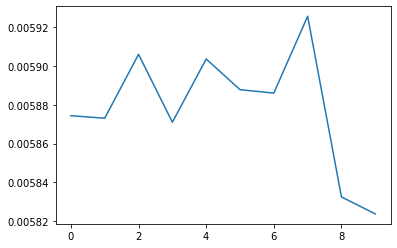

In [19]:
plt.plot([np.nanmean(i) for i in series.loc[:,('strains','strain_p1')]])